In [4]:
import numpy as np
import pandas as pd
import time

from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [5]:

np.random.seed(8)

In [6]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [7]:
df = pd.read_csv('loan_prediction.csv')

In [8]:
df.sample()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
532,3588,0.0,110.0,360.0,0.0,0


In [9]:
df.shape

(614, 6)

In [10]:
from sklearn.tree import DecisionTreeClassifier as dt
clf = dt()

In [11]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
X = df.iloc[:,0:len(df.columns)-1].values
Y = df.iloc[:,-1].values

In [13]:
X.shape

(614, 5)

In [14]:
Y.shape

(614,)

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [16]:
X_train.shape

(460, 5)

In [17]:
Y_train.shape

(460,)

In [18]:
X_test.shape

(154, 5)

In [19]:
scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='f1_macro')

In [20]:
scores.mean()

0.6145160662852625

In [21]:
# Fit the model
clf.fit(X_train, Y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [22]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
train_cols = df.columns[0:len(df.columns)-1]

In [24]:
target_cols = df.columns[-1]

In [25]:
print('The Training F1 Score is', f1_score(train_predictions, Y_train))
print('The Testing F1 Score is', f1_score(test_predictions, Y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.743119266055046


In [26]:
parameters = {'max_depth':[1,2,3,4,5], 
              'min_samples_leaf':[1,2,3,4,5], 
              'min_samples_split':[2,3,4,5],
              'criterion' : ['gini','entropy']}

scorer = make_scorer(f1_score)

In [29]:
@timeit
def generate_clf_from_search(grid_or_random, clf, parameters, scorer, X, y):
    if grid_or_random == "Grid":
        search_obj = GridSearchCV(clf, parameters, scoring=scorer)
        
    elif grid_or_random == "Random":
        search_obj = RandomizedSearchCV(clf, parameters, scoring=scorer)
        
    fit_obj = search_obj.fit(X, y)
    best_clf = fit_obj.best_estimator_
    
    return best_clf, search_obj, fit_obj

In [30]:
best_clf_grid, search,fit = generate_clf_from_search("Grid", 
                                         clf, 
                                         parameters, 
                                         scorer, 
                                         X_train, 
                                         Y_train)

'generate_clf_from_search'  2491.36 ms


In [31]:
fit.cv_results_['params'][0]

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [32]:
fit.cv_results_['mean_test_score'][0]

0.8356047177376769

In [33]:
len(fit.cv_results_['mean_test_score'])

200

In [34]:
out_f1_values = fit.cv_results_['mean_test_score']

In [35]:
out_f1_values.sort()

In [36]:
out_f1_values

array([0.78976203, 0.79070395, 0.79070395, 0.79070395, 0.79070395,
       0.79090473, 0.7923002 , 0.79259313, 0.79438469, 0.79448533,
       0.79448533, 0.79568841, 0.79570629, 0.79570629, 0.79574012,
       0.79731269, 0.79860787, 0.79860787, 0.79860787, 0.79932021,
       0.80507363, 0.80507363, 0.80507363, 0.80507363, 0.80739729,
       0.80749613, 0.80749613, 0.80749613, 0.80750988, 0.80817635,
       0.80869565, 0.80869565, 0.80869565, 0.80932525, 0.80967395,
       0.80967395, 0.80967395, 0.80990968, 0.81048593, 0.81048593,
       0.8105899 , 0.81094531, 0.81168316, 0.81168316, 0.81181327,
       0.81181327, 0.81181327, 0.81181327, 0.81246582, 0.81253712,
       0.81253712, 0.81253712, 0.81253712, 0.81260059, 0.81260059,
       0.81260059, 0.81260059, 0.81310697, 0.81310697, 0.81310697,
       0.81319416, 0.81319416, 0.81319416, 0.81365949, 0.81383531,
       0.81383531, 0.81383531, 0.81436147, 0.81436147, 0.81436147,
       0.81436147, 0.81622428, 0.81622428, 0.81729405, 0.81744

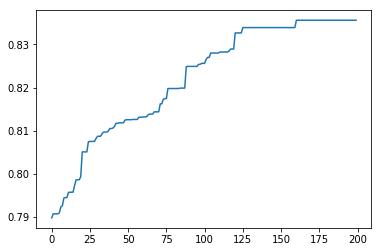

In [37]:
plt.plot(out_f1_values)

In [38]:
r_values = np.random.choice(out_f1_values, 61, replace=False)

In [39]:
r_values[r_values > 0.83390239]

array([0.83560472, 0.83560472, 0.83560472, 0.83560472, 0.83560472,
       0.83560472, 0.83560472, 0.83560472, 0.83560472, 0.83560472,
       0.83560472, 0.83560472])

In [40]:
r_values

array([0.83560472, 0.83390239, 0.81319416, 0.83390239, 0.81253712,
       0.81976757, 0.80967395, 0.83390239, 0.79570629, 0.83560472,
       0.81365949, 0.81976757, 0.81168316, 0.82699635, 0.83390239,
       0.83390239, 0.83390239, 0.83390239, 0.83560472, 0.81986483,
       0.82490084, 0.83560472, 0.82823829, 0.81181327, 0.82823829,
       0.83560472, 0.83390239, 0.83560472, 0.81260059, 0.81986483,
       0.81260059, 0.82892941, 0.83390239, 0.80869565, 0.83560472,
       0.83560472, 0.83390239, 0.82699635, 0.79731269, 0.83390239,
       0.82653386, 0.80507363, 0.81622428, 0.83390239, 0.82490084,
       0.82560797, 0.81253712, 0.80869565, 0.83560472, 0.81260059,
       0.82560797, 0.83390239, 0.80967395, 0.82892941, 0.83560472,
       0.82823829, 0.83390239, 0.83560472, 0.81181327, 0.8105899 ,
       0.83560472])

In [41]:
scores = cross_val_score(best_clf_grid, X_train, Y_train, cv=5, scoring='f1_macro')
scores.mean()

0.7056824255406972

In [45]:
best_clf_grid.fit(X_train, Y_train)

# Make predictions using the new model.
best_train_predictions = best_clf_grid.predict(X_train)
best_test_predictions = best_clf_grid.predict(X_test)


# Calculate the f1_score of the new model.
print('The training F1 Score is {0:.3f}' .format(f1_score(best_train_predictions, Y_train)))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))

The training F1 Score is 0.836
The testing F1 Score is 0.8620689655172413


In [46]:

#Randomized
best_clf_random, _, _ = generate_clf_from_search("Random", 
                                           clf, 
                                           parameters, 
                                           scorer, 
                                           X_train, 
                                           Y_train)

'generate_clf_from_search'  138.63 ms


In [47]:
scores = cross_val_score(best_clf_random, X_train, Y_train, cv=5, scoring='f1_macro')
scores.mean()

0.7056824255406972

In [48]:
best_clf_random.fit(X_train, Y_train)

# Make predictions using the new model.
best_train_predictions = best_clf_random.predict(X_train)
best_test_predictions = best_clf_random.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))

The training F1 Score is 0.8360902255639098
The testing F1 Score is 0.8620689655172413


In [49]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1
